In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import psycopg2

### Extract CSVs into DataFrames

In [2]:
GDP_file = "Resources/GDP.csv"
GDP_df = pd.read_csv(GDP_file)
GDP_df

,SDG_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2015,2015,4.87531,NaN,NaN
1,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2016,2016,5.34201,NaN,NaN
2,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2017,2017,5.41966,NaN,NaN
3,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2018,2018,5.43317,NaN,NaN
4,XGDP_FSGOV,Government expenditure on education as a perce...,IND,India,2015,2015,3.28573,NaN,NaN
...,...,...,...,...,...,...,...,...,...
763,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2015,2015,5.92651,+,National Estimation
764,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2016,2016,5.98030,+,National Estimation
765,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2017,2017,6.10751,+,National Estimation
766,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2018,2018,5.68860,+,National Estimation


### Transform GDP DataFrame

In [3]:
GDP_df = GDP_df[['SDG_IND','Indicator','Country','Time','Value']]
GDP_df=GDP_df.rename(columns={'Country':'country','SDG_IND':'sdg_ind', 'Indicator':'indicator','Time':'year','Value':'edu_percent'})
#GDP_df = GDP_df.set_index('country')
GDP_df

,sdg_ind,indicator,country,year,edu_percent
0,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2015,4.87531
1,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2016,5.34201
2,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2017,5.41966
3,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2018,5.43317
4,XGDP_FSGOV,Government expenditure on education as a perce...,India,2015,3.28573
...,...,...,...,...,...
763,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2015,5.92651
764,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2016,5.98030
765,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2017,6.10751
766,XGDP_FSGOV,Government expenditure on education as a perce...,Suriname,2018,5.68860


In [4]:
GDP_df.index

RangeIndex(start=0, stop=768, step=1)

In [5]:
GDP_clean_df = GDP_df.loc[GDP_df["year"] <2016]
GDP_clean_df

,sdg_ind,indicator,country,year,edu_percent
0,XGDP_FSGOV,Government expenditure on education as a perce...,Chile,2015,4.87531
4,XGDP_FSGOV,Government expenditure on education as a perce...,India,2015,3.28573
6,XGDP_FSGOV,Government expenditure on education as a perce...,Malawi,2015,5.60866
12,XGDP_FSGOV,Government expenditure on education as a perce...,Togo,2015,5.10860
17,XGDP_FSGOV,Government expenditure on education as a perce...,Portugal,2015,4.88554
...,...,...,...,...,...
735,XGDP_FSGOV,Government expenditure on education as a perce...,Italy,2015,4.07363
750,XGDP_FSGOV,Government expenditure on education as a perce...,Bahamas,2015,2.28832
756,XGDP_FSGOV,Government expenditure on education as a perce...,Faeroe Islands,2015,7.71242
759,XGDP_FSGOV,Government expenditure on education as a perce...,Greenland,2015,12.00460


In [6]:
GDP_clean_df.dtypes

sdg_ind         object
indicator       object
country         object
year             int64
edu_percent    float64
dtype: object

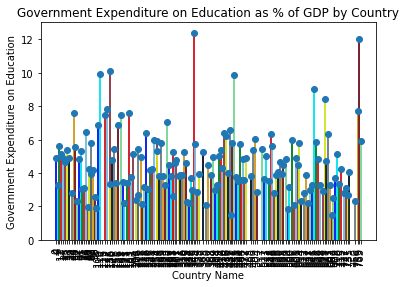

In [7]:
# # using subplots() to draw vertical lines
fig, axes = plt.subplots()
axes.vlines(GDP_clean_df.index, ymin=0, ymax= GDP_clean_df['edu_percent'])
  
# # drawing the markers (circle)
axes.plot(GDP_clean_df.index, GDP_clean_df['edu_percent'], "o")
axes.set_ylim(0)


line_colors = ['blue', 'cyan', 'green', 'red',
                'skyblue', 'brown', 'yellow',
                'black', 'grey', 'orange', 'maroon',
                'lightgreen']
  
axes.vlines(GDP_clean_df.index, ymin=0,
             ymax=GDP_clean_df['edu_percent'], colors=line_colors)


# # formatting and details
plt.xlabel('Country Name')
plt.ylabel('Government Expenditure on Education')
plt.title('Government Expenditure on Education as % of GDP by Country')
plt.xticks(GDP_clean_df.index)
plt.xticks(rotation=90)
plt.show()

In [8]:
GERD_file = "Resources/GERD.csv"
GERD_df = pd.read_csv(GERD_file)
GERD_df

,INDICATOR,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,20600,GERD - Total (in '000 local currency),AUS,Australia,2013,2013,3.347150e+07,NaN,NaN
1,20600,GERD - Total (in '000 local currency),AUS,Australia,2015,2015,3.117900e+07,NaN,NaN
2,20600,GERD - Total (in '000 local currency),AUS,Australia,2017,2017,3.306200e+07,NaN,NaN
3,20600,GERD - Total (in '000 local currency),AUT,Austria,2013,2013,9.571282e+06,NaN,NaN
4,20600,GERD - Total (in '000 local currency),AUT,Austria,2014,2014,1.027518e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6527,EXPGDP_TOT,GERD as a percentage of GDP,MRT,Mauritania,2018,2018,1.081000e-02,NaN,NaN
6528,EXPCAPPPP_CUR,GERD per capita (in current PPP$),MRT,Mauritania,2018,2018,5.577300e-01,NaN,NaN
6529,EXPPPP_CUR,GERD in '000 current PPP$,MRT,Mauritania,2018,2018,2.455848e+03,NaN,NaN
6530,EXPPPP_CONST,GERD in '000 PPP$ (in constant prices - 2005),MRT,Mauritania,2018,2018,1.929943e+03,NaN,NaN


### Transform GERD DataFrame

In [9]:
# Create a filtered dataframe from specific columns

GERD_df = GERD_df[['INDICATOR','Indicator','Country','Time','Value']]
GERD_df=GERD_df.rename(columns={'Country':'country','INDICATOR':'gerd_ind', 'Indicator':'indicator','Time':'year','Value':'gerd_percent'})
#GERD_df = GERD_df.set_index('country')
GERD_df=GERD_df.loc[GERD_df['gerd_ind']== 'EXPGDP_TOT']
GERD_df

,gerd_ind,indicator,country,year,gerd_percent
1445,EXPGDP_TOT,GERD as a percentage of GDP,Australia,2013,2.17870
1446,EXPGDP_TOT,GERD as a percentage of GDP,Australia,2015,1.91918
1447,EXPGDP_TOT,GERD as a percentage of GDP,Australia,2017,1.87466
1448,EXPGDP_TOT,GERD as a percentage of GDP,Austria,2013,2.95492
1449,EXPGDP_TOT,GERD as a percentage of GDP,Austria,2014,3.08429
...,...,...,...,...,...
6484,EXPGDP_TOT,GERD as a percentage of GDP,Eswatini,2015,0.26661
6492,EXPGDP_TOT,GERD as a percentage of GDP,Syrian Arab Republic,2015,0.02053
6497,EXPGDP_TOT,GERD as a percentage of GDP,Côte d'Ivoire,2016,0.07040
6505,EXPGDP_TOT,GERD as a percentage of GDP,Angola,2016,0.03229


In [10]:
dates = [2013, 2014, 2016, 2017, 2018, 2019]
GERD_clean_df=GERD_df[GERD_df.year.isin(dates) == False]
GERD_clean_df

,gerd_ind,indicator,country,year,gerd_percent
1446,EXPGDP_TOT,GERD as a percentage of GDP,Australia,2015,1.91918
1450,EXPGDP_TOT,GERD as a percentage of GDP,Austria,2015,3.04969
1457,EXPGDP_TOT,GERD as a percentage of GDP,Belgium,2015,2.42817
1463,EXPGDP_TOT,GERD as a percentage of GDP,Canada,2015,1.69324
1470,EXPGDP_TOT,GERD as a percentage of GDP,Czechia,2015,1.92923
...,...,...,...,...,...
5782,EXPGDP_TOT,GERD as a percentage of GDP,Asia (South-eastern),2015,0.87510
5788,EXPGDP_TOT,GERD as a percentage of GDP,Asia (Western),2015,0.81803
5806,EXPGDP_TOT,GERD as a percentage of GDP,Europe,2015,1.84086
6484,EXPGDP_TOT,GERD as a percentage of GDP,Eswatini,2015,0.26661


In [11]:
TotalRD_file = "R_D_Total.csv"
TotalRD_df = pd.read_csv(TotalRD_file,header=1)
TotalRD_df=TotalRD_df.rename(columns={"Country":'country','Time ':'year', 'Value':'number_per_thousand'})
#TotalRD_df = TotalRD_df.set_index('country')
TotalRD_df.fillna(0)
TotalRD_df['number_per_thousand'] = TotalRD_df['number_per_thousand'].replace("..", "0")
TotalRD_df

,country,year,number_per_thousand
0,Algeria,2017,8.34905
1,Angola,2016,0.18168
2,Argentina,2015,5.5933
3,Argentina,2016,5.73809
4,Argentina,2017,5.55853
...,...,...,...
309,United Arab Emirates,2016,20.37984
310,Uruguay,2015,2.56995
311,Uruguay,2016,2.53343
312,Uruguay,2017,2.47829


In [12]:
dates = [2013, 2014, 2016, 2017, 2018, 2019]
TotalRD_Clean_df=TotalRD_df[TotalRD_df.year.isin(dates) == False]
TotalRD_Clean_df


,country,year,number_per_thousand
2,Argentina,2015,5.5933
5,Armenia,2015,3.77812
8,Austria,2015,28.16698
10,Azerbaijan,2015,4.75049
13,Belarus,2015,5.14577
...,...,...,...
302,Uganda,2015,5.11131
305,Ukraine,2015,2.1641
308,United Arab Emirates,2015,19.78304
310,Uruguay,2015,2.56995


In [13]:
TotalRD_Clean_df.dtypes


country                object
year                    int64
number_per_thousand    object
dtype: object

### Create database connection

In [14]:
connection_string = "postgres:@localhost:5432/unesco_db"
engine = create_engine(f'postgresql://{connection_string}')

In [15]:
# Confirm tables
engine.table_names()

/var/folders/6x/83dn3sr912jd1wjj53dxy4140000gn/T/ipykernel_19210/3015872754.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['gerd', 'rd', 'edu']

### Load DataFrames into database

In [19]:
GDP_clean_df.to_sql(name='edu', con=engine, if_exists='append', index=True)

IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "edu_pkey"
DETAIL:  Key (index)=(0) already exists.

[SQL: INSERT INTO edu (index, sdg_ind, indicator, country, year, edu_percent) VALUES (%(index)s, %(sdg_ind)s, %(indicator)s, %(country)s, %(year)s, %(edu_percent)s)]
[parameters: ({'index': 0, 'sdg_ind': 'XGDP_FSGOV', 'indicator': 'Government expenditure on education as a percentage of GDP (%)', 'country': 'Chile', 'year': 2015, 'edu_percent': 4.87531}, {'index': 4, 'sdg_ind': 'XGDP_FSGOV', 'indicator': 'Government expenditure on education as a percentage of GDP (%)', 'country': 'India', 'year': 2015, 'edu_percent': 3.28573}, {'index': 6, 'sdg_ind': 'XGDP_FSGOV', 'indicator': 'Government expenditure on education as a percentage of GDP (%)', 'country': 'Malawi', 'year': 2015, 'edu_percent': 5.60866}, {'index': 12, 'sdg_ind': 'XGDP_FSGOV', 'indicator': 'Government expenditure on education as a percentage of GDP (%)', 'country': 'Togo', 'year': 2015, 'edu_percent': 5.1086}, {'index': 17, 'sdg_ind': 'XGDP_FSGOV', 'indicator': 'Government expenditure on education as a percentage of GDP (%)', 'country': 'Portugal', 'year': 2015, 'edu_percent': 4.88554}, {'index': 23, 'sdg_ind': 'XGDP_FSGOV', 'indicator': 'Government expenditure on education as a percentage of GDP (%)', 'country': 'Palestine', 'year': 2015, 'edu_percent': 4.66322}, {'index': 27, 'sdg_ind': 'XGDP_FSGOV', 'indicator': 'Government expenditure on education as a percentage of GDP (%)', 'country': 'Barbados', 'year': 2015, 'edu_percent': 5.38292}, {'index': 33, 'sdg_ind': 'XGDP_FSGOV', 'indicator': 'Government expenditure on education as a percentage of GDP (%)', 'country': 'Mauritius', 'year': 2015, 'edu_percent': 4.88667}  ... displaying 10 of 156 total bound parameter sets ...  {'index': 759, 'sdg_ind': 'XGDP_FSGOV', 'indicator': 'Government expenditure on education as a percentage of GDP (%)', 'country': 'Greenland', 'year': 2015, 'edu_percent': 12.0046}, {'index': 763, 'sdg_ind': 'XGDP_FSGOV', 'indicator': 'Government expenditure on education as a percentage of GDP (%)', 'country': 'Suriname', 'year': 2015, 'edu_percent': 5.92651})]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

In [17]:
GERD_clean_df.to_sql(name='gerd', con=engine, if_exists='append', index=True)

In [18]:
TotalRD_Clean_df.to_sql(name='rd', con=engine, if_exists='append', index=True)

# SQL Queries

In [20]:
pd.read_sql_query('select count(*)from gerd', con=engine)

,count
0,136


In [21]:
pd.read_sql_query('select * from gerd', con=engine).head()

,index,country,gerd_ind,indicator,year,gerd_percent
0,1446,Australia,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.91918
1,1450,Austria,EXPGDP_TOT,GERD as a percentage of GDP,2015,3.04969
2,1457,Belgium,EXPGDP_TOT,GERD as a percentage of GDP,2015,2.42817
3,1463,Canada,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.69324
4,1470,Czechia,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.92923


In [25]:
pd.read_sql_query('select edu.country,  edu.edu_percent, gerd.gerd_percent from edu inner join gerd on edu.country = gerd.country;', con=engine).head()


,country,edu_percent,gerd_percent
0,Chile,4.87531,0.38073
1,India,3.28573,0.69310
2,Portugal,4.88554,1.24330
3,United Kingdom of Great Britain and Northern I...,5.55305,1.64985
4,Germany,4.85515,2.93003


In [28]:
df=pd.read_sql_query('select edu.country,  edu.edu_percent, gerd.gerd_percent from edu inner join gerd on edu.country = gerd.country;', con=engine)


In [29]:
df

,country,edu_percent,gerd_percent
0,Chile,4.87531,0.38073
1,India,3.28573,0.69310
2,Portugal,4.88554,1.24330
3,United Kingdom of Great Britain and Northern I...,5.55305,1.64985
4,Germany,4.85515,2.93003
...,...,...,...
75,Philippines,3.33000,0.15683
76,Armenia,2.80591,0.25002
77,Romania,3.10963,0.48793
78,Pakistan,2.65002,0.24605
